In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy.io

#Used for SVM at the end
import cvxopt as cvp

## Part 1

In [2]:
#Importing the data from the given path
data = scipy.io.loadmat('allFaces.mat')

#Outputting the headers
print(scipy.io.whosmat('allFaces.mat'))

[('faces', (32256, 2410), 'double'), ('n', (1, 1), 'double'), ('m', (1, 1), 'double'), ('sub', (1, 1), 'struct'), ('nfaces', (1, 38), 'double'), ('person', (1, 1), 'double')]


In [3]:
#Extracting the different elements of the data
faces = np.array(data['faces']).astype('float64')
img_h = int(data['n'])
img_w = int(data['m'])
sub = data['sub']
num_faces = np.array(data['nfaces']).astype('uint8')
num_people = data['person']
print(num_people)
num_people = num_people[0,0]
num_faces = np.reshape(num_faces, (num_people,))

[[38]]


In [4]:
#Function that converts a face vector into an image
def reconstruct_img(img_vect):
    img = np.reshape(img_vect, (img_w, img_h))
    img = img.T
    return img

In [5]:
#Creating a function that allows a given persons faces to be printed with specified number of rows and columns
def print_person(person_ind, rows, cols):
    person_ind -= 1
    spacing = 0
    for i in range(person_ind):
        spacing += num_faces[i]

    p_faces = np.zeros((rows * cols, img_h, img_w))
    for i in range(num_faces[person_ind]):
        p_faces[i] = reconstruct_img(faces[:, spacing + i])

    p_fig, p_ax = plt.subplots(rows, cols, figsize = [12, 12])
    p_fig.suptitle(f'Faces of person {person_ind}')

    for i in range(rows):
        for j in range(cols):
            p_ax[i, j].imshow(p_faces[i*rows + j])
            p_ax[i, j].tick_params(which = 'both', size = 0, labelsize = 0)

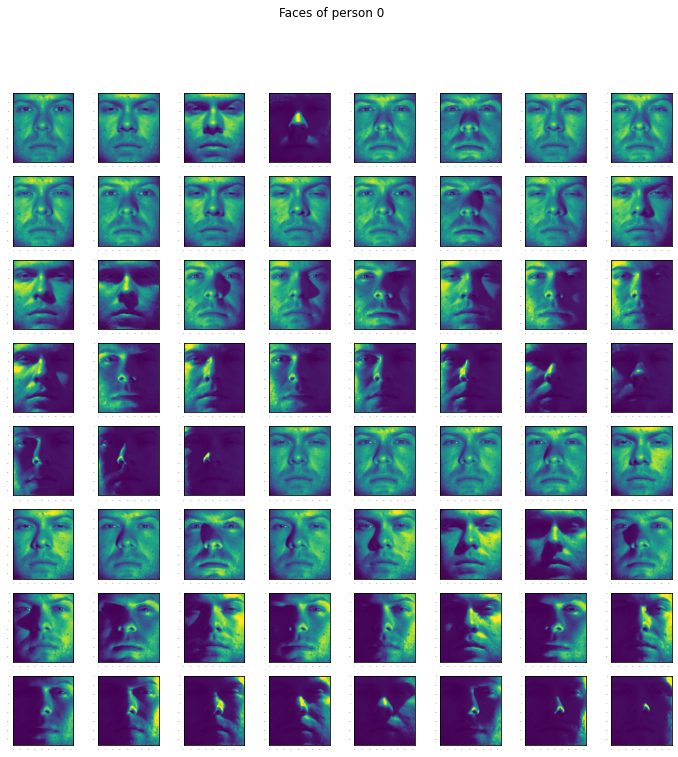

In [6]:
#Printing person 1 with 8 rows and 8 columns
print_person(1, 8, 8)

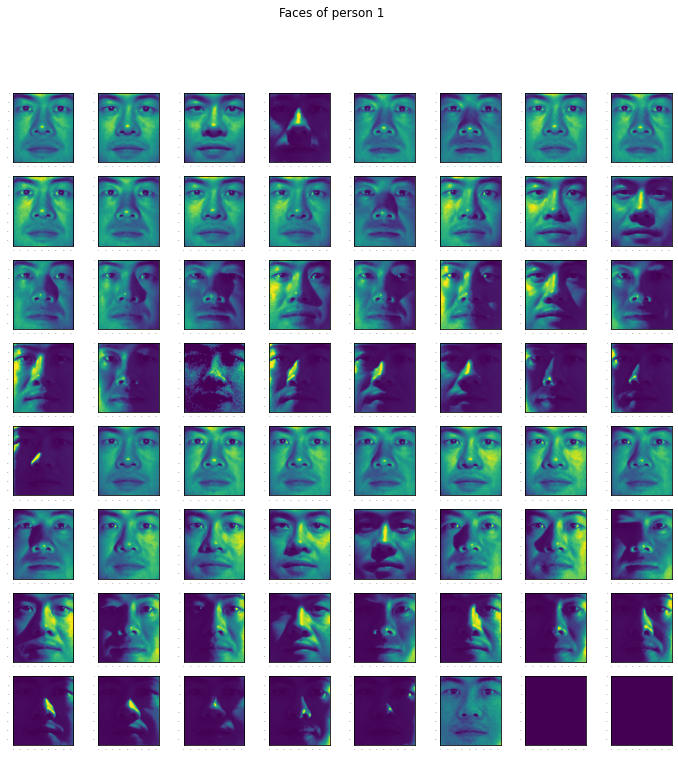

In [7]:
#Printing person 2 with 8 rows and 8 columns
print_person(2, 8, 8)

## Part 2

Text(0.5, 0.98, 'Average of all faces')

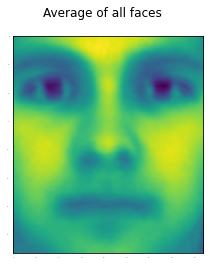

In [8]:
#Finding the average face of all faces
avg_faces = np.mean(faces, axis = 1)
avg_faces = np.reshape(avg_faces, (avg_faces.shape[0], 1))
cent_faces = faces - avg_faces

#Plotting the average face
avg_faces_img = np.reshape(avg_faces, (img_w, img_h)).T
avg_fig, avg_ax = plt.subplots()
avg_ax.imshow(avg_faces_img)
avg_ax.tick_params(which = 'both', size = 0, labelsize = 0)
avg_fig.suptitle('Average of all faces')

## Part 3

In [9]:
#Doing SVD on the dataset
U, S, V = np.linalg.svd(faces)

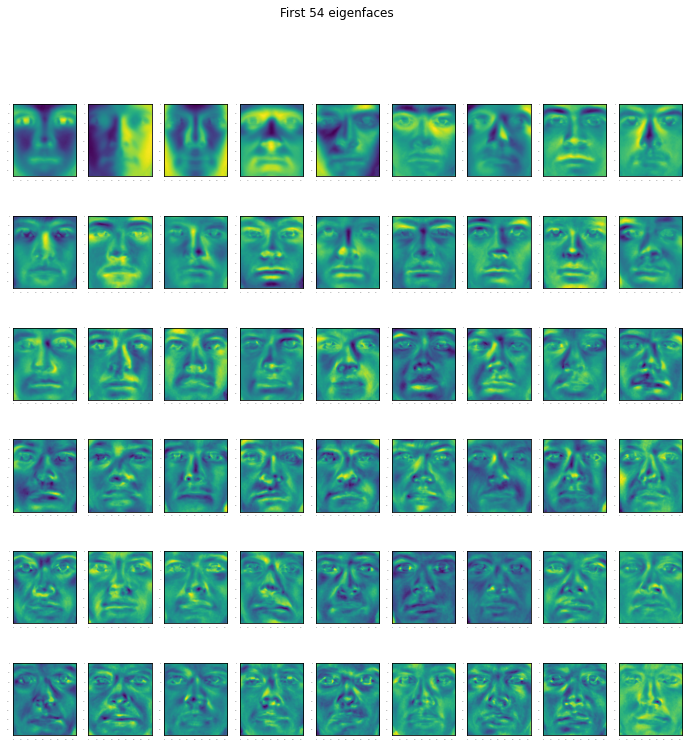

In [10]:
#Reconstructing the first 56 eigenfaces from their eigenvectors
eigenfaces = np.zeros((56, img_h, img_w))
for i in range(56):
    eigenfaces[i] = reconstruct_img(U[:, i])

#Plotting the first 56 eigenfaces
eigen_fig, eigen_ax = plt.subplots(6, 9, figsize = [12, 12])
eigen_fig.suptitle(f'First 54 eigenfaces')

for i in range(6):
    for j in range(9):
        eigen_ax[i, j].imshow(eigenfaces[i*9 + j])
        eigen_ax[i, j].tick_params(which = 'both', size = 0, labelsize = 0)

In [11]:
#Extracting PCA1 and PCA5 and turning them into column vectors
U1 = np.reshape(U[:, 0], (U[:, 0].shape[0], 1))
U5 = np.reshape(U[:, 4], (U[:, 4].shape[0], 1))

#Calculating the inner product of PCA1 and PCA5 to see if they are orthogonal
print(f'The inner product of U1 and U5 is: {np.dot(U1.T, U5)}\n')

#Extracting PCA10 and PCA15 and turning them into column vectors
U10 = np.reshape(U[:, 9], (U[:, 9].shape[0], 1))
U15 = np.reshape(U[:, 14], (U[:, 14].shape[0], 1))

#Calculating the inner product of PCA10 and PCA15 to see if they are orthogonal
print(f'The inner product of U10 and U15 is: {np.dot(U1.T, U5)}')

The inner product of U1 and U5 is: [[-6.24500451e-17]]

The inner product of U10 and U15 is: [[-6.24500451e-17]]


## Part 4

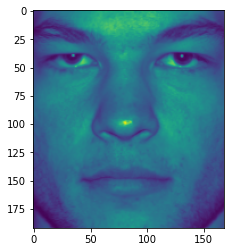

In [12]:
#Finding the starting index of person 37
spacing = 0
for i in range(36):
    spacing += num_faces[i]

p37_face = faces[:, spacing]

#Plotting the first image of person 37
p37_img = reconstruct_img(p37_face)
plt.imshow(p37_img)

In [13]:
#Defining variables used to find alphas
r = faces.shape[1]
p37_face_vect = np.reshape(p37_face, (p37_face.shape[0], 1))

p37_alphas = []

#Calculating r (2,410) alphas for person 37
for i in range(r):
    U_i = np.reshape(U[:, i], (U[:, i].shape[0], 1))
    p37_alphas.append(np.dot(U_i.T, p37_face_vect))
    
p37_alphas = np.array(p37_alphas)

(1, 32256)


Text(0.5, 0.98, 'r = 5 approximation of person 37')

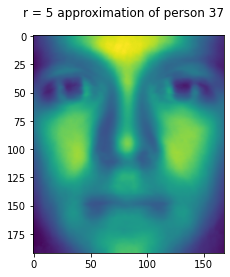

In [14]:
#Combining the amount of the first 5 PC in person 37
p37_r5 = np.zeros((p37_face.shape[0],))
print(np.multiply(p37_alphas[0], U[:, i]).shape)
for i in range(5):
    p37_r5 += np.reshape(np.multiply(p37_alphas[i], U[:, i]), (U[:, i].shape[0],))

#Plotting the reconstructed face
p37_r5_img = reconstruct_img(p37_r5)
p37_r5_fig, p37_r5_ax = plt.subplots()
p37_r5_ax.imshow(p37_r5_img)
p37_r5_fig.suptitle('r = 5 approximation of person 37')

(1, 32256)


Text(0.5, 0.98, 'r = 10 approximation of person 37')

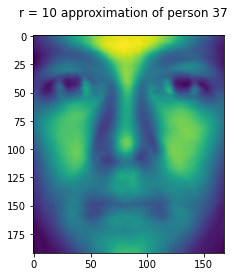

In [15]:
#Combining the amount of the first 10 PC in person 37
p37_r10 = np.zeros((p37_face.shape[0],))
print(np.multiply(p37_alphas[0], U[:, i]).shape)
for i in range(10):
    p37_r10 += np.reshape(np.multiply(p37_alphas[i], U[:, i]), (U[:, i].shape[0],))

#Plotting the reconstructed face
p37_r10_img = reconstruct_img(p37_r10)
p37_r10_fig, p37_r10_ax = plt.subplots()
p37_r10_ax.imshow(p37_r10_img)
p37_r10_fig.suptitle('r = 10 approximation of person 37')

(1, 32256)


Text(0.5, 0.98, 'r = 200 approximation of person 37')

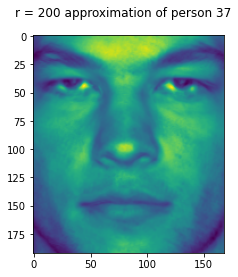

In [16]:
#Combining the amount of the first 200 PC in person 37
p37_r200 = np.zeros((p37_face.shape[0],))
print(np.multiply(p37_alphas[0], U[:, i]).shape)
for i in range(200):
    p37_r200 += np.reshape(np.multiply(p37_alphas[i], U[:, i]), (U[:, i].shape[0],))

#Plotting the reconstructed face
p37_r200_img = reconstruct_img(p37_r200)
p37_r200_fig, p37_r200_ax = plt.subplots()
p37_r200_ax.imshow(p37_r200_img)
p37_r200_fig.suptitle('r = 200 approximation of person 37')

(1, 32256)


Text(0.5, 0.98, 'r = 800 approximation of person 37')

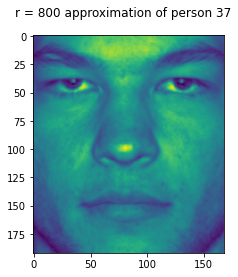

In [17]:
#Combining the amount of the first 800 PC in person 37
p37_r800 = np.zeros((p37_face.shape[0],))
print(np.multiply(p37_alphas[0], U[:, i]).shape)
for i in range(800):
    p37_r800 += np.reshape(np.multiply(p37_alphas[i], U[:, i]), (U[:, i].shape[0],))

#Plotting the reconstructed face
p37_r800_img = reconstruct_img(p37_r800)
p37_r800_fig, p37_r800_ax = plt.subplots()
p37_r800_ax.imshow(p37_r800_img)
p37_r800_fig.suptitle('r = 800 approximation of person 37')

(1, 32256)


Text(0.5, 0.98, 'r = 100 approximation of person 37')

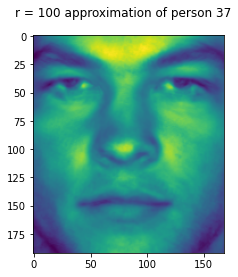

In [18]:
#Combining the amount of the first 100 PC in person 37
p37_r100 = np.zeros((p37_face.shape[0],))
print(np.multiply(p37_alphas[0], U[:, i]).shape)
for i in range(100):
    p37_r100 += np.reshape(np.multiply(p37_alphas[i], U[:, i]), (U[:, i].shape[0],))

#Plotting the reconstructed face
p37_r100_img = reconstruct_img(p37_r100)
p37_r100_fig, p37_r100_ax = plt.subplots()
p37_r100_ax.imshow(p37_r100_img)
p37_r100_fig.suptitle('r = 100 approximation of person 37')

## Part 5

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

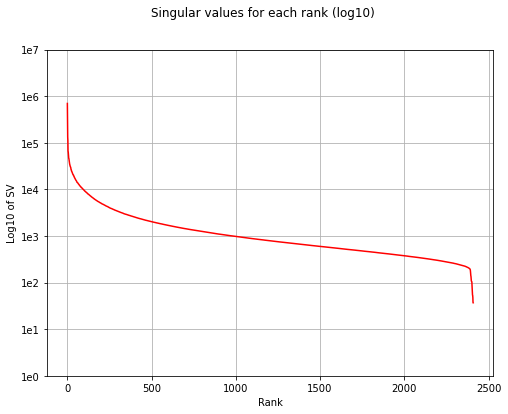

In [19]:
#Defining some plot tick variables
S_log10 = np.log10(S)
ytick_spacing = list(range(int(np.ceil(np.max(S_log10))) + 2))
ytick_labels = []
for i in ytick_spacing:
    ytick_labels.append(f'1e{i}')

#Plotting the singular values for each PC
ranks = list(range(S.shape[0]))
ranks_fig, ranks_ax = plt.subplots(figsize = [8,6])
ranks_ax.plot(ranks, S_log10, color = 'r')
print(ranks)
ranks_ax.set_yticks(ytick_spacing)
ranks_ax.set_yticklabels(ytick_labels)
ranks_fig.suptitle('Singular values for each rank (log10)')
ranks_ax.set_xlabel('Rank')
ranks_ax.set_ylabel('Log10 of SV')
ranks_ax.grid()

## Part 6

In [20]:
#SVM training algorithm from mini project 3
def svm_train(x, y, kernel = 'linear', P = 2, gamma = 3, C = None):
    n = y.shape[0]
    Q = np.zeros((n, n))
    
    if kernel == 'linear':
        for i in range(n):
            for j in range(n):
                Q[i, j] = y[i] * y[j] * np.dot(x[i], x[j])
    elif kernel == 'polynomial':
        for i in range(n):
            for j in range(n):
                Q[i, j] = y[i] * y[j] * np.power(5 + np.dot(x[i], x[j]), P)
    elif kernel == 'gaussian':
        for i in range(n):
            for j in range(n):
                Q[i, j] = y[i] * y[j] * np.exp((-1 * np.square(np.linalg.norm(x[i] - x[j], ord = None)))/(2 * np.square(gamma)))
    else:
        print('Invalid kernel input!\n')
        return
    
    print((Q==Q.T).all())

    P_qp = cvp.matrix(Q)
    q_qp = cvp.matrix(np.ones((n, 1)))
    if C is None:
        G_qp = cvp.matrix(np.diag(np.ones(n) * -1))
        h_qp = cvp.matrix(np.zeros(n))
    else:
        G_qp = cvp.matrix(np.vstack((np.diag(np.ones(n) * -1), np.identity(n))))
        h_qp = cvp.matrix(np.hstack((np.zeros(n), np.ones(n) * C)))
    A_qp = cvp.matrix(y.T)
    b_qp = cvp.matrix(0.0)

    alphas = cvp.solvers.qp(P = P_qp, q = -q_qp, G = G_qp, h = h_qp, A = A_qp, b = b_qp)['x']
    alphas = np.array(alphas)
    
    support_vect_x = []
    support_vect_y = []
    alphas_nz = []
    num_vect = 0
    
    for i in range(n):
        if (alphas[i][0] > 1e-5):
            support_vect_x.append(x[i])
            support_vect_y.append(y[i])
            alphas_nz.append(alphas[i])
            num_vect += 1
    
    max_alpha_ind = alphas_nz.index(np.max(alphas_nz))
    
    support_vect_x = np.reshape(np.array(support_vect_x), (num_vect, x.shape[1]))
    support_vect_y = np.reshape(np.array(support_vect_y), (num_vect, y.shape[1]))
    alphas_nz = np.reshape(np.array(alphas_nz), (num_vect, alphas.shape[1]))

    if num_vect > 0:
        intercept = support_vect_y[0]
        to_sum = 0
        for i in range(num_vect):
            if kernel == 'linear':
                to_sum += alphas_nz[i] * support_vect_y[i] * np.dot(support_vect_x[i].T, support_vect_x[max_alpha_ind])
            elif kernel == 'polynomial':
                to_sum += alphas_nz[i] * support_vect_y[i]* np.power(5 + np.dot(support_vect_x[i].T, support_vect_x[max_alpha_ind]), P)
            elif kernel == 'gaussian':
                to_sum += alphas_nz[i] * support_vect_y[i] * np.exp((-1 * np.square(np.linalg.norm(support_vect_x[i] - support_vect_x[max_alpha_ind], ord = None)))/(2 * np.square(gamma)))
        intercept = intercept - to_sum
    
    return support_vect_x, support_vect_y, alphas_nz, intercept
 
    

#SVM testing algorithm from mini project 3
def svm_test(x, sv_x, sv_y, alphas, intercept, kernel = 'linear', P = 2, gamma = 1):
    num_obs = x.shape[0]
    num_vect = sv_x.shape[0]
    
    y = np.zeros((num_obs, 1))
    
    for i in range(num_obs):
        to_sum = 0
        for j in range(num_vect):
            if kernel == 'linear':
                to_sum += alphas[j] * sv_y[j] * np.dot(sv_x[j].T, x[i])
            elif kernel == 'polynomial':
                to_sum += alphas[j] * sv_y[j] * np.power(5 + np.dot(sv_x[j].T, x[i]), P)
            elif kernel == 'gaussian':
                to_sum += alphas[j] * sv_y[j] * np.exp((-1 * np.square(np.linalg.norm(sv_x[j] - x[i], ord = None)))/(2 * np.square(gamma)))
            else:
                print('Invalid kernel input!\n')
                return
        
        y[i] = np.sign(to_sum + intercept)
    
    return y

In [21]:
#Empty arrays that will store alpha values
p2_r5_alphas = []
p2_r6_alphas = []

p7_r5_alphas = []
p7_r6_alphas = []

#Finding where the index for person 2 starts
p2_person_ind = 1
p2_spacing = 0
for i in range(p2_person_ind):
    p2_spacing += num_faces[i]

#Finding where the index for person 7 starts
p7_person_ind = 6
p7_spacing = 0
for i in range(p7_person_ind):
    p7_spacing += num_faces[i]

#Defining PCA5 and PCA6 as column vectors
U5 = np.reshape(U[:, 4], (U[:, 4].shape[0], 1))
U6 = np.reshape(U[:, 5], (U[:, 5].shape[0], 1))

#Empty x and y arrays for SVM training
x = []
y = []

#Finding the alphas for person 2
for i in range(num_faces[1]):
    p2_r5_alphas.append(np.dot(U5.T, np.reshape(faces[:, i + p2_spacing], (faces[:, i + p2_spacing].shape[0], 1))))
    p2_r6_alphas.append(np.dot(U6.T, np.reshape(faces[:, i + p2_spacing], (faces[:, i + p2_spacing].shape[0], 1))))
    x.append(np.array([p2_r5_alphas[i][0][0], p2_r6_alphas[i][0][0]]))
    y.append(np.array([1.]))
    
print(f'The amount of eigenface 5 in person 2 from picture 1 to {num_faces[1]} is:\n{p2_r5_alphas}\n')
print(f'The amount of eigenface 6 in person 2 from picture 1 to {num_faces[1]} is:\n{p2_r6_alphas}\n')

#Finding the alphas for person 7
for i in range(num_faces[6]):
    p7_r5_alphas.append(np.dot(U5.T, np.reshape(faces[:, i + p7_spacing], (faces[:, i + p7_spacing].shape[0], 1))))
    p7_r6_alphas.append(np.dot(U6.T, np.reshape(faces[:, i + p7_spacing], (faces[:, i + p7_spacing].shape[0], 1))))
    x.append(np.array([p7_r5_alphas[i][0][0], p7_r6_alphas[i][0][0]]))
    y.append(np.array([-1.]))
    
x = np.array(x)
y = np.array(y)

The amount of eigenface 5 in person 2 from picture 1 to 62 is:
[array([[-1388.37735682]]), array([[-1680.67539448]]), array([[-1900.74441419]]), array([[-849.32492493]]), array([[-1227.2696415]]), array([[-855.50940854]]), array([[-1798.52899401]]), array([[-1399.54422641]]), array([[-1630.29586741]]), array([[-950.14005306]]), array([[-1645.64879576]]), array([[-1411.47095679]]), array([[-298.51029745]]), array([[-1606.39990562]]), array([[-2044.54385903]]), array([[-1724.85952097]]), array([[-468.81167095]]), array([[-700.66402835]]), array([[661.38220764]]), array([[-1626.79558788]]), array([[545.43445978]]), array([[159.16996244]]), array([[-2158.44854688]]), array([[1726.48641837]]), array([[-834.82100459]]), array([[1627.43052932]]), array([[-27.06341788]]), array([[683.57330634]]), array([[-943.66438608]]), array([[-1570.21051268]]), array([[2031.52777278]]), array([[1326.9773185]]), array([[132.48952551]]), array([[-1542.81019476]]), array([[-1685.19481665]]), array([[-1727.276

Text(0, 0.5, 'PCA6')

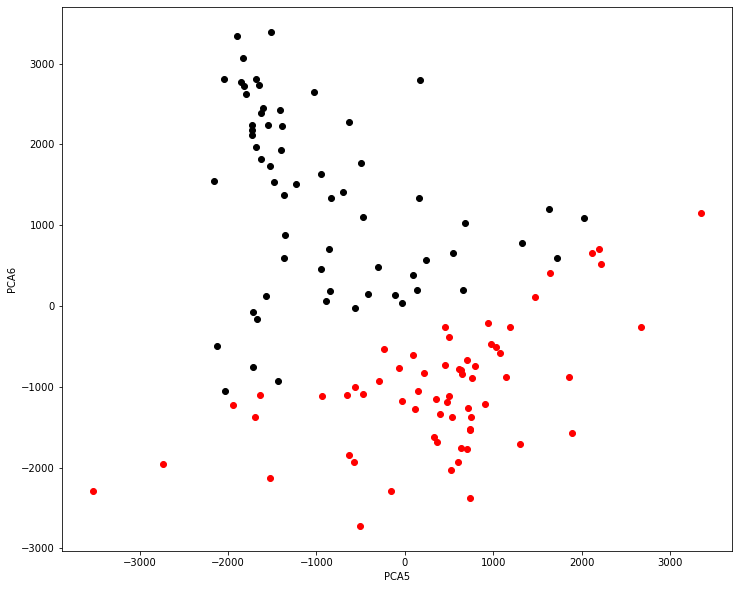

In [22]:
#Plotting both people (person 2 in black and person 7 in red) with PCA5 against PCA6
p2vp7_fig, p2vp7_ax = plt.subplots(figsize = [12,10])
p2vp7_ax.scatter(p2_r5_alphas, p2_r6_alphas, color = 'k')
p2vp7_ax.scatter(p7_r5_alphas, p7_r6_alphas, color = 'r')
p2vp7_ax.set_xlabel('PCA5')
p2vp7_ax.set_ylabel('PCA6')

In [23]:
#Training the SVM on the x and y values defined above
sv_x, sv_y, alphas, intercept = svm_train(x, y, 'linear')

True
     pcost       dcost       gap    pres   dres
 0: -4.1672e+01 -9.3492e+01  5e+02  2e+01  2e+00
 1: -1.2041e+02 -1.3037e+02  2e+02  1e+01  1e+00
 2: -2.9213e+02 -2.9570e+02  3e+02  9e+00  1e+00
 3: -7.6772e+02 -7.6788e+02  3e+02  9e+00  1e+00
 4: -3.6169e+03 -3.5101e+03  4e+02  9e+00  1e+00
 5: -2.1763e+02 -1.9085e+02  1e+03  8e+00  9e-01
 6: -3.5836e+02 -2.8059e+02  1e+03  7e+00  8e-01
 7: -1.6498e+03 -7.6717e+02  5e+02  4e+00  5e-01
 8: -5.9391e+01 -4.4082e+00  3e+02  7e-01  7e-02
 9: -4.5774e+00 -2.0244e-02  2e+01  4e-02  4e-03
10: -4.6067e-02 -7.6931e-04  2e-01  4e-04  4e-05
11: -7.4689e-04 -7.6195e-04  2e-03  3e-06  4e-07
12: -6.4402e-04 -6.6628e-04  1e-04  1e-07  2e-08
13: -6.6362e-04 -6.6384e-04  1e-06  1e-09  2e-10
14: -6.6381e-04 -6.6381e-04  1e-08  1e-11  2e-12
Optimal solution found.


In [24]:
#Scaling the data to obtain 500x500 x values to test
x1 = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 500)
scale1 = 500/(np.max(x[:,0]) - np.min(x[:,0]))
x2 = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 500)
scale2 = 500/(np.max(x[:,1]) - np.min(x[:,1]))

y_list = np.zeros((500, 500))

#Calculating the decision boundary with resolution 500x500
for i in range(500):
    for j in range(500):
        y_list[i, j] = svm_test(np.array([[x1[i], x2[j]]]), sv_x, sv_y, alphas, intercept, 'linear')

Text(0, 0.5, 'PCA6 (scaled)')

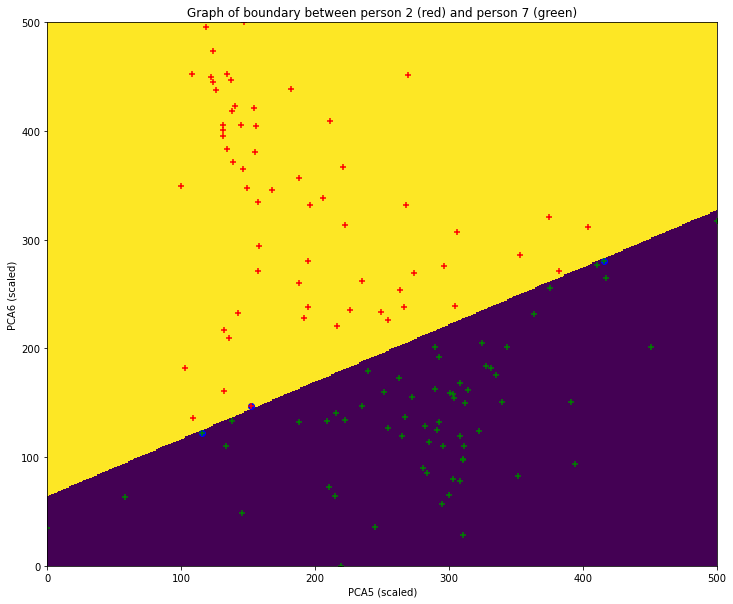

In [25]:
#Separating the two classes
class1 = []
class2 = []

for i in range(y.shape[0]):
    if y[i] == 1:
        class1.append(x[i])
    elif y[i] == -1:
        class2.append(x[i])

class1 = np.array(class1)
class2 = np.array(class2)

#Plotting the decision boundary (color mesh), the points for either class, and the support vectors (blue highlights)
svm_fig, svm_ax = plt.subplots(figsize=[12,10])
svm_ax.pcolormesh(y_list.T)
svm_ax.scatter(scale1*(sv_x[:,0] - np.min(x[:,0])), scale2*(sv_x[:,1] - np.min(x[:,1])), color = 'b')
svm_ax.scatter(scale1*(class2[:,0] - np.min(x[:,0])), scale2*(class2[:,1] - np.min(x[:,1])), color = 'g', marker = "+")
svm_ax.scatter(scale1*(class1[:,0]- np.min(x[:,0])), scale2*(class1[:,1] - np.min(x[:,1])), color = 'r', marker = "+")
svm_ax.set_title('Graph of boundary between person 2 (red) and person 7 (green)')
svm_ax.set_xlabel('PCA5 (scaled)')
svm_ax.set_ylabel('PCA6 (scaled)')